# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

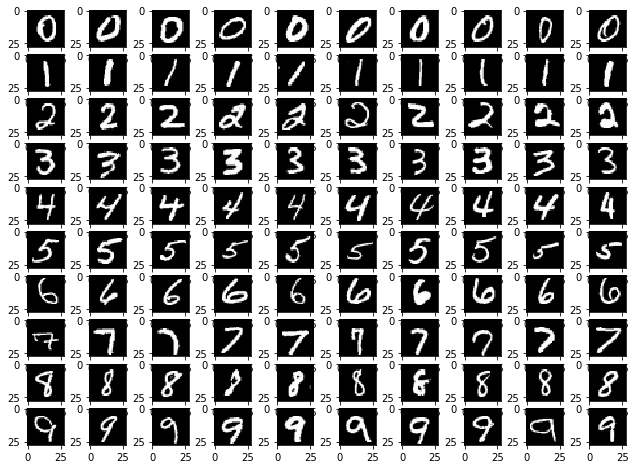

In [4]:
def P1(num_examples=10):
    
### STUDENT START ###
    # Takes an mnist_array and reshapes to 28 x 28 then plots
    def img_processing(mnist_array):
        new_arr = mnist_array.reshape(28, 28)
        figure = plt.imshow(new_arr)
        plt.set_cmap('gray')
        return figure
    plt.figure(1, figsize=[11.0, 8.0])
    k = 1
    # Plots 10 of each digit in subplots
    for digit in range(10):
        examples = np.where(Y == str(digit))
        random_num = examples[0][0:num_examples]
        j = 0
        while j < num_examples and k < 101:
            indx = random_num[j]
            img_arr = X[indx]
            plt.subplot(10, 10, k)
            img_processing(img_arr)
            j += 1
            k += 1
            
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        predicted_train_mini = model.predict(dev_data)
        
        print("k-value:", k)
        print(classification_report(mini_train_labels, predicted_train_mini))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k-value: 1
              precision    recall  f1-score   support

           0       0.14      0.16      0.15        91
           1       0.10      0.14      0.11        96
           2       0.08      0.08      0.08        91
           3       0.11      0.10      0.10       103
           4       0.13      0.11      0.12        97
           5       0.11      0.12      0.11        84
           6       0.19      0.18      0.18       106
           7       0.14      0.14      0.14       116
           8       0.06      0.04      0.05       123
           9       0.08      0.09      0.08        93

   micro avg       0.11      0.11      0.11      1000
   macro avg       0.11      0.12      0.11      1000
weighted avg       0.11      0.11      0.11      1000

k-value: 3
              precision    recall  f1-score   support

           0       0.14      0.16      0.15        91
           1       0.11      0.16      0.13        96
           2       0.09      0.09      0.09        91
  

**ANSWER: The most difficult digit to classify is 8 because the F1 score is the lowest for k=1.**

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for i in train_sizes:
        train_data_sample = train_data[:i]
        train_labels_sample = train_labels[:i]
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data_sample, train_labels_sample)
        dev_predicted_labels = model.predict(dev_data)
        
        start_time = time.time()
        performance = model.score(dev_data, dev_labels)
        accuracies.append(performance)
        end_time = time.time()
        print("Sample size:", i)
        print("Time elapsed:", end_time - start_time)
        print(performance)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Sample size: 100
Time elapsed: 0.09143304824829102
0.702
Sample size: 200
Time elapsed: 0.1977379322052002
0.791
Sample size: 400
Time elapsed: 0.39430999755859375
0.811
Sample size: 800
Time elapsed: 0.7739920616149902
0.866
Sample size: 1600
Time elapsed: 1.5794689655303955
0.905
Sample size: 3200
Time elapsed: 3.1440839767456055
0.927
Sample size: 6400
Time elapsed: 6.251013994216919
0.939
Sample size: 12800
Time elapsed: 14.101733922958374
0.952
Sample size: 25600
Time elapsed: 26.665858030319214
0.963


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

R^2: 0.4177006634161019
Predicted Accuracy for 60000: 1.2361731707874237
Predicted Accuracy for 120000: 1.637428053637104
Predicted Accuracy for 1000000: 7.522499668765751
R^2 for new model: 0.8649045423180002
Predicted Accuracy for 60000: 0.9832927097569462
Predicted Accuracy for 120000: 0.9911143865080189
Predicted Accuracy for 1000000: 0.9988704258725941


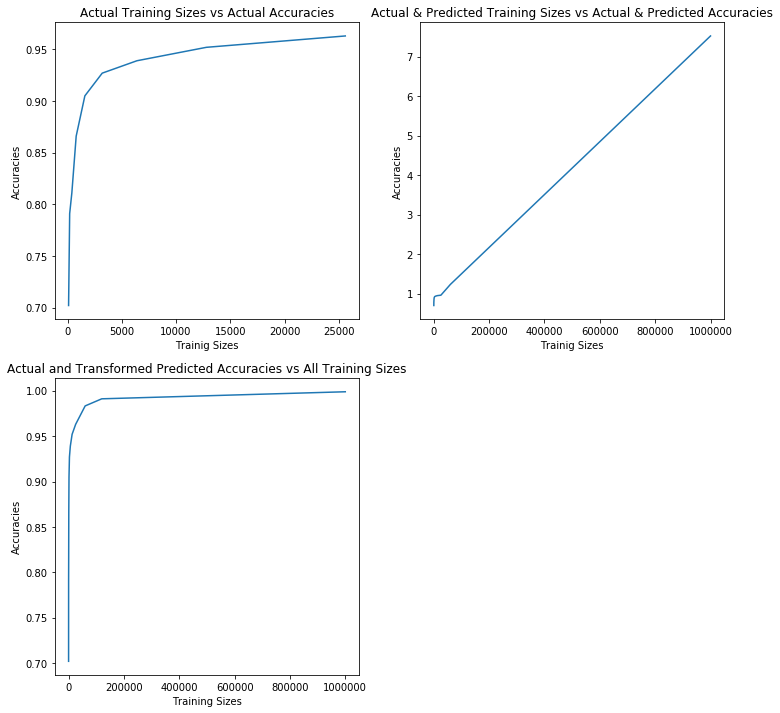

In [7]:
def P4():

### STUDENT START ###
    global accuracies, train_sizes
    
    # Make each input in X a vector
    train_sizes_arr = [[item] for item in train_sizes]
    
    # Create and train model then predict on new sizes
    lin_model_1 = LinearRegression()
    lin_model_1.fit(train_sizes_arr, accuracies)
    sizes_to_predict = [[60000], [120000], [1000000]]
    predicted_acc = lin_model_1.predict(sizes_to_predict)
    
    # Print R^2 value and the predicted accuracies
    print("R^2:", lin_model_1.score(train_sizes_arr, accuracies))
    print("Predicted Accuracy for 60000:", predicted_acc[0])
    print("Predicted Accuracy for 120000:", predicted_acc[1])
    print("Predicted Accuracy for 1000000:", predicted_acc[2])
    
    # Plot actual training sizes versus actual accuracies
    plt.figure(figsize=(12, 12))
    
    plt.subplot(2, 2, 1)
    plt.plot(train_sizes, accuracies)
    plt.xlabel("Trainig Sizes")
    plt.ylabel("Accuracies")
    plt.title("Actual Training Sizes vs Actual Accuracies")
    
    # Plot both predicted and actual training sizes versus actual accuracies & training sizes
    all_train_sizes = np.array(train_sizes_arr + sizes_to_predict)
    all_accuracies = np.concatenate([accuracies, predicted_acc])
    plt.subplot(2, 2, 2)
    plt.plot(all_train_sizes, all_accuracies)
    plt.xlabel("Trainig Sizes")
    plt.ylabel("Accuracies")
    plt.title("Actual & Predicted Training Sizes vs Actual & Predicted Accuracies")
    
    ## TRANSFORMATION
    new_train_sizes_arr = np.array(train_sizes).reshape(-1, 1)
    new_accuracies_arr = np.array(accuracies).reshape(-1, 1)
    
    # Calculates odds ratio
    def odds(acc):
        return 1/(1-acc)
    
    # Creates new linear regression with transformed data
    trans_acc = odds(new_accuracies_arr)
    trans_linreg = LinearRegression()
    trans_linreg.fit(new_train_sizes_arr, trans_acc)
    
    def reverse(acc):
        return 1 - (1/acc)
    
    # Makes predictions and rescales
    trans_predict = reverse(trans_linreg.predict(np.array(sizes_to_predict)))
    
    # Print R^2 and predictions for accuracy
    print("R^2 for new model:", trans_linreg.score(new_train_sizes_arr, trans_acc))
    print("Predicted Accuracy for 60000:", trans_predict[0][0])
    print("Predicted Accuracy for 120000:", trans_predict[1][0])
    print("Predicted Accuracy for 1000000:", trans_predict[2][0])
    
    # Plots transformed model
    all_sizes = np.concatenate([new_train_sizes_arr, sizes_to_predict])
    all_accuracies = np.concatenate([new_accuracies_arr, trans_predict])
    plt.subplot(2, 2, 3)
    plt.plot(all_sizes, all_accuracies)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracies")
    plt.title("Actual and Transformed Predicted Accuracies vs All Training Sizes")
    
    plt.show()
    
### STUDENT END ###

P4()

**ANSWER: Linear regression doesn't work because there isn't a linear relationship between training sizes and the accuracies, instead it's logistic, and that is why the predictions without transformation predict over 1 for accuracy.**

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


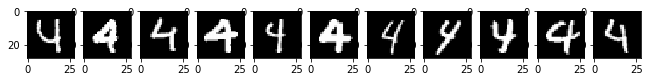

In [8]:
def P5():

### STUDENT START ###
    # Processes the mnist_arrays by reshaping into 28 x 28 then plots
    def img_processing(mnist_array):
        new_arr = mnist_array.reshape(28, 28)
        figure = plt.imshow(new_arr)
        plt.set_cmap('gray')
        return figure
    
    # Creates 1NN model, trains and predicts on dev_data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    predicted_train_mini = model.predict(dev_data)
    
    # Measures performance using confusion_matrix
    performance = confusion_matrix(dev_labels, predicted_train_mini)
    print(performance)
    
    # Gets all the 4s that were confused as 9s and prints them
    fours = np.where(dev_labels == '4')
    predicted = np.where(predicted_train_mini == '9')
    confused = np.intersect1d(fours, predicted)
    plt.figure(1, figsize=[11.0, 8.0])
    for i in range(11):
        indx = confused[i]
        img_arr = dev_data[indx]
        plt.subplot(1, 11, i+1)
        img_processing(img_arr)
### STUDENT END ###

P5()

**ANSWER: The pair of digits that the model confuses most often are 4 and 9, since 4 was confused as 9 eleven times.**

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [9]:
def P6():
    
### STUDENT START ###
    # Reshapes data into 28 x 28
    def reshaping(dataset):
        reshaped_data = []
        for mnist_array in dataset:
            new_arr = mnist_array.reshape(28, 28)
            reshaped_data.append(new_arr)
        return np.array(reshaped_data)
    
    # Gets all the surrounding pixels and filters for non-negativity
    def surrounding_pix(row, col):
        surrounding = [[row-1, col],[row-1, col+1],[row, col+1],[row+1, col+1],[row+1, col],[row-1, col-1],[row, col-1],[row+1, col-1]]
        filtered = [pair for pair in surrounding if 0 <= pair[0] <= 27 and 0 <= pair[1] <= 27]
        return filtered
    
    # Applies the Gaussian blur by taking average of original value and eight neighboring pixels
    def gaussian_blur(dataset):
        
        blur_applied = []
        for img in dataset:
            output = np.zeros((28, 28))
            for row in range(28):
                for col in range(28):
                    other_pix = surrounding_pix(row, col)
                    total = 0
                    for i in other_pix:
                        total += img[i[0], i[1]]
                    kernel = (total + img[row,col]) / len(other_pix)
                    output[row, col] = kernel * img[row, col]
            blur_applied.append(output)
        return np.array(blur_applied)
    
    # Reshaped & blurred data to use
    reshape_mini = reshaping(mini_train_data)
    blurred_mini = gaussian_blur(reshape_mini)
    reshape_dev = reshaping(dev_data)
    blurred_dev = gaussian_blur(reshape_dev)
    
    #Filtered training & unfiltered dev
    model1 = KNeighborsClassifier(n_neighbors=1)
    model1.fit(blurred_mini.reshape(1000, 784), mini_train_labels)
    predicted_dev = model1.predict(dev_data)
    print("Accuracy for filtered training data & unfiltered dev data:", model1.score(dev_data, dev_labels))
    
    #Filtered dev & unfiltered training
    model2 = KNeighborsClassifier(n_neighbors=1)
    model2.fit(mini_train_data, mini_train_labels)
    predicted_blurred_dev = model2.predict(blurred_dev.reshape(1000, 784))
    print("Accuracy for unfiltered training data & filtered dev data:", model2.score(blurred_dev.reshape(1000,784), dev_labels))
    
    #Filtered both
    model3 = KNeighborsClassifier(n_neighbors=1)
    model3.fit(blurred_mini.reshape(1000, 784), mini_train_labels)
    predicted_blurred = model3.predict(blurred_dev.reshape(1000, 784))
    print("Accuracy for both filtered:", model3.score(blurred_dev.reshape(1000, 784), dev_labels))
    
    #No filter
    model4 = KNeighborsClassifier(n_neighbors=1)
    model4.fit(mini_train_data, mini_train_labels)
    predicted_dev = model4.predict(dev_data)
    print("Accuracy for no filters:", model4.score(dev_data, dev_labels))
    
### STUDENT END ###

P6()

Accuracy for filtered training data & unfiltered dev data: 0.886
Accuracy for unfiltered training data & filtered dev data: 0.816
Accuracy for both filtered: 0.847
Accuracy for no filters: 0.884


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [10]:
def P7():

### STUDENT START ###
    # Create BernoulliNB model with binarize threshold of 0.5 and prints accuracy
    bernoulli_model = BernoulliNB(binarize=0.5)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    bern_predictions = bernoulli_model.predict(dev_data)
    print("Bernoulli accuracy:", bernoulli_model.score(dev_data, dev_labels))
    
    # Takes dataset and for each image checks which threshold the pixel falls in and then assigns a new value of 0, 1, or 2
    # and outputs a new array of processed images
    def multinomial_process(dataset):
        processed_data = []
        for img in dataset:
            output = np.zeros(784)
            for i in range(784):
                if 0 <= img[i] < 0.33:
                    output[i] = 0
                elif 0.33 <= img[i] < 0.66:
                    output[i] = 1
                elif 0.66 <= img[i] <= 1:
                    output[i] = 2
            processed_data.append(output)
        return np.array(processed_data)
    
    # Pre-processes data for MultinomialNB model
    multi_processed_data = multinomial_process(mini_train_data)
    
    # Creates MultinomialNB model, trains on mini train data, makes predictions on dev_data, and prints accuracy
    multinomial_model = MultinomialNB()
    multinomial_model.fit(multi_processed_data, mini_train_labels)
    multi_predictions = multinomial_model.predict(dev_data)
    print("Multinomial accuracy:", multinomial_model.score(dev_data, dev_labels))
### STUDENT END ###

P7()

Bernoulli accuracy: 0.819
Multinomial accuracy: 0.815


**ANSWER: Using the multinomial version did not improve accuracy because the Bernoulli model is more generalizable.**

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [11]:
def P8(alphas):

### STUDENT START ###
    # Creates BernoulliNB model with threshold of 0.5
    bnb_model = BernoulliNB(binarize=0.5)
    
    # Uses GridSearchCV to go through all the alpha parameters
    grid = GridSearchCV(bnb_model, alphas, scoring='accuracy', cv=5)
    grid.fit(mini_train_data, mini_train_labels)
    scores = grid.cv_results_['mean_test_score']
    for i in range(len(scores)):
        print("Accuracy for alpha=%.10f:" % alphas['alpha'][i], scores[i])
    return grid

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha:", nb.best_params_)

Accuracy for alpha=0.0000000001: 0.83
Accuracy for alpha=0.0001000000: 0.838
Accuracy for alpha=0.0010000000: 0.841
Accuracy for alpha=0.0100000000: 0.836
Accuracy for alpha=0.1000000000: 0.827
Accuracy for alpha=0.5000000000: 0.825
Accuracy for alpha=1.0000000000: 0.823
Accuracy for alpha=2.0000000000: 0.817
Accuracy for alpha=10.0000000000: 0.764

Best alpha: {'alpha': 0.001}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**ANSWER: The best value for alpha was 0.001 with an accuracy of 84.1%. The accuracy when near zero is around 0.83, which I expected since it's lower than the maximum since LaPlace smoothing is stronger for bigger alphas. However, when the alphas got significantly larger and acted on a data set with a relatively small range, it's accuracy was significantly impacted as well.**

### Part 9:

Produce a model using Gaussian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [12]:
def P9():

### STUDENT END ###
    # Create GaussianNB model as is and measure accuracy
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    gnb_predictions = gnb.predict(dev_data)
    print("Original accuracy:", gnb.score(dev_data, dev_labels))
    
    # Create a GaussianNB model with var_smoothing and measure accuracy
    gnb_2 = GaussianNB(var_smoothing=0.1)
    gnb_2.fit(mini_train_data, mini_train_labels)
    gnb_2_predictions = gnb_2.predict(dev_data)
    print("New accuracy:", gnb_2.score(dev_data, dev_labels))

### STUDENT END ###

P9()

Original accuracy: 0.593
New accuracy: 0.817


**ANSWER: My solution was to add a smoothing parameter to the model, which helped shift a lot of the sigmas that were 0 in order to reduce noise.**

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

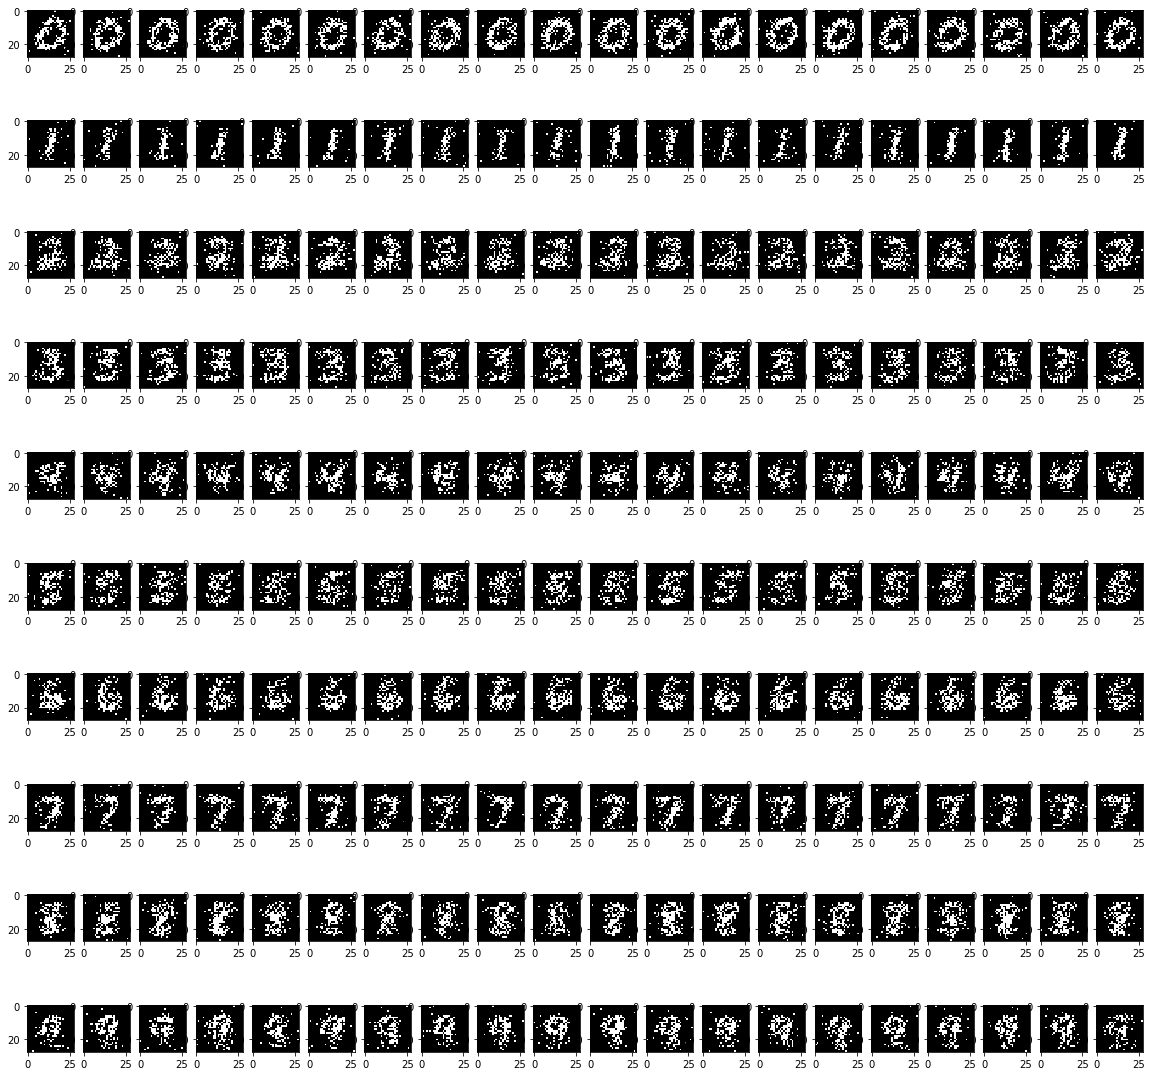

In [13]:
def P10(num_examples):

### STUDENT START ###
    # Create BernoulliNB model
    bnb_model = BernoulliNB(binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)

    # Create matrix of images and labels
    bi_matrix = np.ndarray((10*num_examples, 784))
    bi_labels = np.ndarray((10*num_examples))
    for i in range(10*num_examples):
        bi_labels[i] = i % 10
        bi_matrix[i] = [np.random.rand() < np.exp(x) for x in bnb_model.feature_log_prob_[i%10]]
    
    # Generate a 10x20 grid of images of the digits
    figure, ax = plt.subplots(10, num_examples, figsize=(20, 20))
    for digit in range(10):
        digit_loc = np.where(bi_labels == digit)
        examples = []
        for loc in digit_loc[0]:
            examples.append(bi_matrix[loc])
        np.array(examples)
        for k in range(num_examples):
            ax[digit, k].imshow(examples[k].reshape(28, 28), cmap='gray')

    
### STUDENT END ###

P10(20)

**ANSWER: The generated images are not as clear as the training digit images; it's harder to make out the number but you can see the vague shape.**

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [14]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Helper function that helps partition into buckets based on the posterior probability
    def buckets_search(buckets, max_post):
        if max_post <= buckets[0]:
            return 0
        else:
            return buckets_search(buckets[1:], max_post) + 1
    
    # Generate BernoulliNB model & predictions
    bnb_model = BernoulliNB(alpha=1, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    predict_labels = bnb_model.predict(dev_data)
    
    # Loop over dev_data to update values for accuracy
    for i, img in enumerate(dev_data):
        reshaped_img = img.reshape(1, 784)
        posterior_prob = bnb_model.predict_proba(reshaped_img)
        max_posterior = np.max(posterior_prob)
        indx = buckets_search(buckets, max_posterior)
        
        # Update correct counter
        if predict_labels[i] == dev_labels[i]:
            correct[indx] += 1
        
        # Update total counter
        total[indx] += 1
        
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   1    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  47    accuracy = 0.383
p(pred) is 0.9000000000000 to 0.9990000000000    total = 106    accuracy = 0.491
p(pred) is 0.9990000000000 to 0.9999900000000    total =  75    accuracy = 0.520
p(pred) is 0.9999900000000 to 0.9999999000000    total =  80    accuracy = 0.825
p(pred) is 0.9999999000000 to 0.9999999990000    total =  71    accuracy = 0.817
p(pred) is 0.9999999990000 to 0.9999999999900    total =  74    accuracy = 0.892
p(pred) is 0.9999999999900 to 0.9999999999999    total =  70    accuracy = 0.886
p(pred) is 0.9999999999999 to 1.0000000000000    total = 476    accuracy = 0.962


**ANSWER: This Bernoulli Naive Bayes model is a weakly calibrated model because the classifier is more accurate when the posterior probability of the predicted class is 90% than when it was at 80%, instead of being strongly calibrated because at 90% the accuracy is only 49.1%.**

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [15]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()